<a href="https://colab.research.google.com/github/afsanamimii/Go-Greener-A-leaf-classification-app-using-Tensorflow-/blob/main/thesis_work_with_cnn(Mimi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
assert tf.__version__.startswith('2')
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from zipfile import ZipFile
import os
file_name="FINAL_THESIS_DATASET.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  base_dir='/content/FINAL_THESIS_DATASET/NoyontaraandStrawberry'
  print("done")

done


In [ ]:
#pre processing
IMAGE_SIZE = 224
BATCH_SIZE = 64

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, 
    validation_split=0.1)


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
     validation_split=0.1 
                   )

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = validation_datagen .flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 3426 images belonging to 4 classes.
Found 378 images belonging to 4 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 4))

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labelsnoyontara3.txt', 'w') as f:
  f.write(labels)

{'Catharanthus_roseus_Yellow': 0, 'Catharanthus_roseus_healthy': 1, 'Strawberry_healthy': 2, 'Strawberry_leaf_scrotch': 3}


In [ ]:
from tensorflow.keras.layers import Dense, Conv2D

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',strides=2,input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',strides=2))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',strides=2))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',strides=2))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(Dense(4,activation='softmax'))


In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
epochs=10

history = cnn.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))



Epoch 1/10
54/54 [==============================] - 77s 1s/step - loss: 1.2752 - accuracy: 0.4139 - val_loss: 0.7149 - val_accuracy: 0.6825
Epoch 2/10
54/54 [==============================] - 76s 1s/step - loss: 0.4501 - accuracy: 0.8323 - val_loss: 0.3148 - val_accuracy: 0.9021
Epoch 3/10
54/54 [==============================] - 77s 1s/step - loss: 0.2687 - accuracy: 0.8919 - val_loss: 0.3553 - val_accuracy: 0.9074
Epoch 4/10
54/54 [==============================] - 76s 1s/step - loss: 0.2064 - accuracy: 0.9179 - val_loss: 0.3553 - val_accuracy: 0.9259
Epoch 5/10
54/54 [==============================] - 76s 1s/step - loss: 0.1688 - accuracy: 0.9375 - val_loss: 0.3149 - val_accuracy: 0.9233
Epoch 6/10
54/54 [==============================] - 75s 1s/step - loss: 0.1376 - accuracy: 0.9519 - val_loss: 0.2746 - val_accuracy: 0.9312
Epoch 7/10
54/54 [==============================] - 77s 1s/step - loss: 0.1244 - accuracy: 0.9534 - val_loss: 0.4246 - val_accuracy: 0.8942
Epoch 8/10
54/54 [==

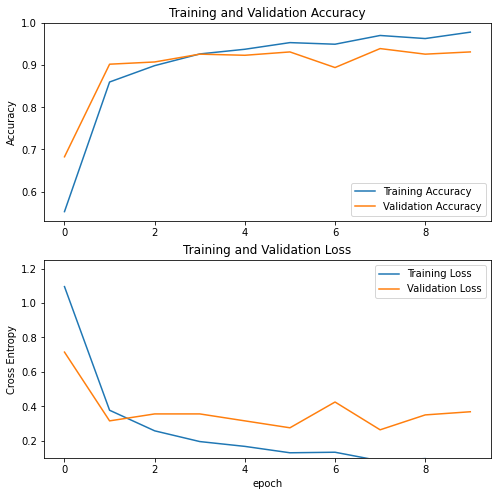

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.1,1.25])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = cnn.evaluate(val_generator)

6/6 [==============================] - 2s 341ms/step - loss: 0.3679 - accuracy: 0.9312


In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 32)         

In [ ]:
saved_model_dir = 'save/fine_tuning_n1'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('modelnoyontara3.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files

files.download('modelnoyontara3.tflite')
files.download('labelsnoyontara3.txt')